This notebook was tested under the new environment with Python 3.10 and following packages:
- drfp==0.3.7
- ipykernel==7.2.0
- numpy==2.2.6
- rdkit==2025.9.4
- scikit-learn==1.7.2
- pandas==2.3.3
- matplotlib==3.10.8

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from drfp import DrfpEncoder
random_seed = 42

## C–H arylation dataset

In [3]:
rxn_data = pd.read_csv("../dataset/rxn_data/aryl-scope-ligand.csv")
lig_smi_lst, rct1_smi_lst, rct2_smi_lst, pdt_smi_lst = rxn_data['ligand_smiles'].to_list(),rxn_data['electrophile_smiles'].to_list(),rxn_data['nucleophile_smiles'].to_list(),rxn_data['product_smiles'].to_list()
label = rxn_data['yield'].to_numpy()
len(set(lig_smi_lst)),len(rxn_data)

(24, 1536)

### Without CatEmb

In [4]:
rxn_smi_lst = [f"{rct1}.{rct2}.{lig}>>{pdt}" for rct1, rct2, lig, pdt in zip(rct1_smi_lst, rct2_smi_lst, lig_smi_lst, pdt_smi_lst)]
rxn_fp_arr = np.array(DrfpEncoder.encode(rxn_smi_lst))

In [5]:
r2_ave = []
mae_ave = []
#model = deepcopy(model2)
model = ExtraTreesRegressor(n_estimators=500,random_state=random_seed,n_jobs=-1)
all_test_y = []
all_test_p = []
for seed in range(10):
    train_x,test_x,train_y,test_y = train_test_split(rxn_fp_arr,label,test_size=0.2,random_state=seed)
    model.fit(train_x,train_y)
    test_p = model.predict(test_x)
    r2 = r2_score(test_y,test_p)
    mae = mean_absolute_error(test_y,test_p)
    print(f"seed: {seed}, r2: {r2:.4f}, mae: {mae:.4f}")
    all_test_y.append(test_y)
    all_test_p.append(test_p)
    r2_ave.append(r2)
    mae_ave.append(mae)
r2_ave = np.mean(r2_ave)
mae_ave = np.mean(mae_ave)
print(f"r2_ave: {r2_ave:.4f}, mae_ave: {mae_ave:.4f}")

seed: 0, r2: 0.4243, mae: 12.5703
seed: 1, r2: 0.3895, mae: 14.0676
seed: 2, r2: 0.6538, mae: 10.5693
seed: 3, r2: 0.5275, mae: 12.2176
seed: 4, r2: 0.6416, mae: 10.5759
seed: 5, r2: 0.5624, mae: 11.1557
seed: 6, r2: 0.5154, mae: 12.5159
seed: 7, r2: 0.5287, mae: 12.0338
seed: 8, r2: 0.4950, mae: 12.1361
seed: 9, r2: 0.5536, mae: 11.5601
r2_ave: 0.5292, mae_ave: 11.9402


### With CatEmb

In [7]:
lig_cat_emb = np.loadtxt("./gen_desc/aryl_scope_cat_emb.txt")
lig_smi4chk = np.loadtxt("./gen_desc/aryl_scope_cat_emb_smi.txt",dtype=str)
for lig,ligc in zip(lig_smi_lst,lig_smi4chk):
    assert lig == ligc

In [8]:
rxn_smi_lst = [f"{rct1}.{rct2}>>{pdt}" for rct1, rct2, pdt in zip(rct1_smi_lst, rct2_smi_lst, pdt_smi_lst)]
rxn_fp_arr = np.array(DrfpEncoder.encode(rxn_smi_lst))
rxn_merge_fp = np.concatenate((rxn_fp_arr,lig_cat_emb),axis=1)

In [9]:
r2_ave = []
mae_ave = []
#model = deepcopy(model2)
model = ExtraTreesRegressor(n_estimators=500,random_state=random_seed,n_jobs=-1)
all_test_y = []
all_test_p = []
for seed in range(10):
    train_x,test_x,train_y,test_y = train_test_split(rxn_merge_fp,label,test_size=0.2,random_state=seed)
    model.fit(train_x,train_y)
    test_p = model.predict(test_x)
    r2 = r2_score(test_y,test_p)
    mae = mean_absolute_error(test_y,test_p)
    print(f"seed: {seed}, r2: {r2:.4f}, mae: {mae:.4f}")
    all_test_y.append(test_y)
    all_test_p.append(test_p)
    r2_ave.append(r2)
    mae_ave.append(mae)
r2_ave = np.mean(r2_ave)
mae_ave = np.mean(mae_ave)
print(f"r2_ave: {r2_ave:.4f}, mae_ave: {mae_ave:.4f}")

seed: 0, r2: 0.6212, mae: 10.4504
seed: 1, r2: 0.6471, mae: 11.0761
seed: 2, r2: 0.7254, mae: 9.5812
seed: 3, r2: 0.7178, mae: 10.1598
seed: 4, r2: 0.7880, mae: 8.6184
seed: 5, r2: 0.7514, mae: 9.0790
seed: 6, r2: 0.7161, mae: 10.3604
seed: 7, r2: 0.6820, mae: 10.7995
seed: 8, r2: 0.6257, mae: 10.8802
seed: 9, r2: 0.6815, mae: 10.5732
r2_ave: 0.6956, mae_ave: 10.1578


R2: 0.6212, MAE: 10.4504


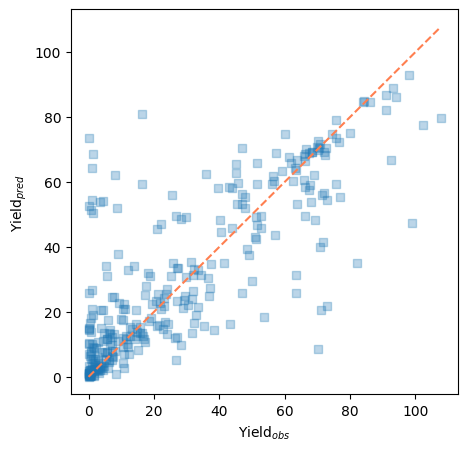

R2: 0.6471, MAE: 11.0761


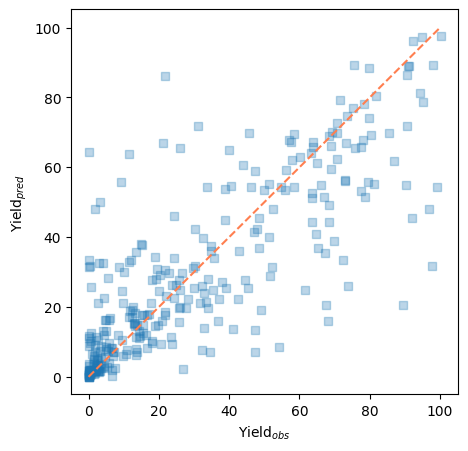

R2: 0.7254, MAE: 9.5812


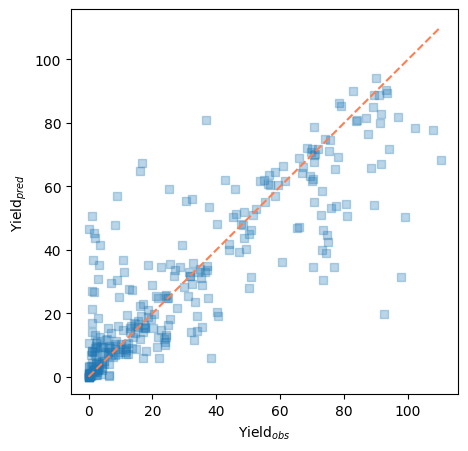

R2: 0.7178, MAE: 10.1598


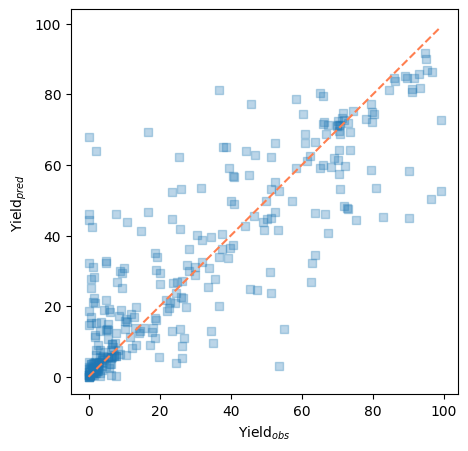

R2: 0.7880, MAE: 8.6184


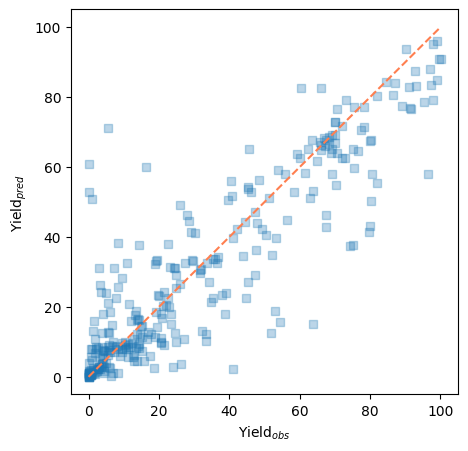

R2: 0.7514, MAE: 9.0790


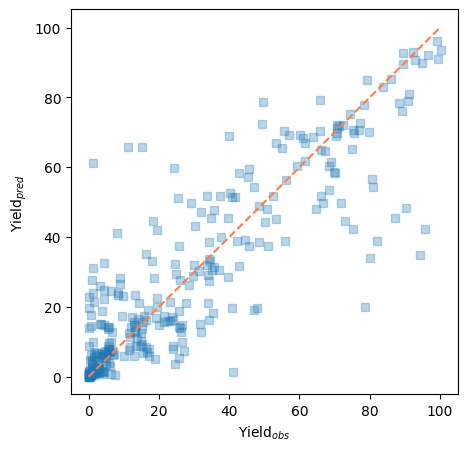

R2: 0.7161, MAE: 10.3604


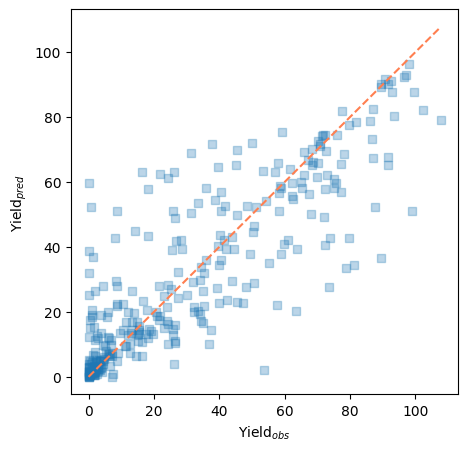

R2: 0.6820, MAE: 10.7995


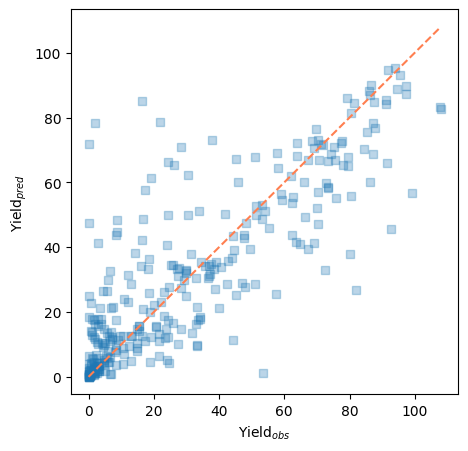

R2: 0.6257, MAE: 10.8802


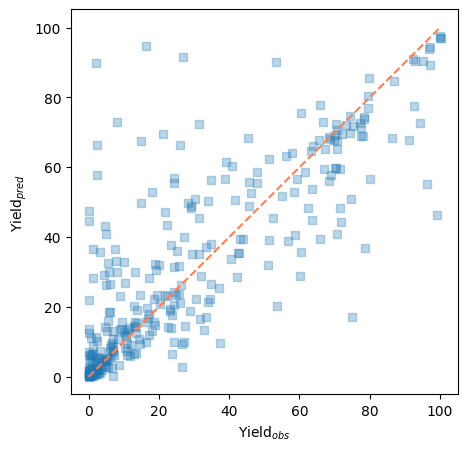

R2: 0.6815, MAE: 10.5732


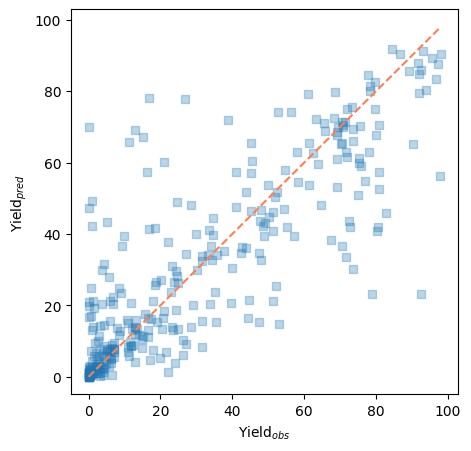

In [13]:
for trial in range(10):
    print(f"R2: {r2_score(all_test_y[trial],all_test_p[trial]):.4f}, MAE: {mean_absolute_error(all_test_y[trial],all_test_p[trial]):.4f}")
    plt.figure(figsize=(5,5))
    plt.scatter(all_test_y[trial],all_test_p[trial],alpha=0.3,marker="s")
    plt.plot([min(all_test_y[trial]),max(all_test_y[trial])],[min(all_test_y[trial]),max(all_test_y[trial])],"--",color="coral")
    plt.xlabel("Yield$_{obs}$")
    plt.ylabel("Yield$_{pred}$")
    plt.show()
    

## Asymmetric thiol addition dataset

In [14]:
rxn_data = pd.read_csv("../dataset/rxn_data/NS_acetal_dataset_with_pdt.csv")
rxn_data

,Unnamed: 0,Imine,Thiol,Catalyst,ΔΔG,Product
0,0,O=C(/N=C/c1ccccc1)c1ccccc1,Sc1ccccc1,O=P1(O)Oc2c(-c3ccccc3)cc3ccccc3c2-c2c(c(-c3ccc...,1.179891,O=C(NC(Sc1ccccc1)c1ccccc1)c1ccccc1
1,1,O=C(/N=C/c1ccccc1)c1ccccc1,CCS,O=P1(O)Oc2c(-c3ccccc3)cc3ccccc3c2-c2c(c(-c3ccc...,0.501759,CCSC(NC(=O)c1ccccc1)c1ccccc1
2,2,O=C(/N=C/c1ccccc1)c1ccccc1,SC1CCCCC1,O=P1(O)Oc2c(-c3ccccc3)cc3ccccc3c2-c2c(c(-c3ccc...,0.650584,O=C(NC(SC1CCCCC1)c1ccccc1)c1ccccc1
3,3,O=C(/N=C/c1ccccc1)c1ccccc1,COc1ccc(S)cc1,O=P1(O)Oc2c(-c3ccccc3)cc3ccccc3c2-c2c(c(-c3ccc...,1.238109,COc1ccc(SC(NC(=O)c2ccccc2)c2ccccc2)cc1
4,4,O=C(/N=C/c1ccc(C(F)(F)F)cc1)c1ccccc1,Sc1ccccc1,O=P1(O)Oc2c(-c3ccccc3)cc3ccccc3c2-c2c(c(-c3ccc...,1.179891,O=C(NC(Sc1ccccc1)c1ccc(C(F)(F)F)cc1)c1ccccc1
...,...,...,...,...,...,...
1070,1070,O=C(/N=C/c1ccccc1)c1ccccc1,Sc1ccccc1,O=P1(O)Oc2c(-c3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc3c...,1.531803,O=C(NC(Sc1ccccc1)c1ccccc1)c1ccccc1
1071,1071,O=C(/N=C/c1ccccc1)c1ccccc1,Cc1ccccc1S,O=P1(O)Oc2c(-c3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc3c...,1.531803,Cc1ccccc1SC(NC(=O)c1ccccc1)c1ccccc1
1072,1072,O=C(/N=C/c1ccc(C(F)(F)F)cc1)c1ccccc1,Cc1ccccc1S,O=P1(O)Oc2c(-c3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc3c...,1.370104,Cc1ccccc1SC(NC(=O)c1ccccc1)c1ccc(C(F)(F)F)cc1
1073,1073,O=C(/N=C/c1cccc2ccccc12)c1ccccc1,Sc1ccccc1,O=P1(O)Oc2c(-c3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc3c...,1.301167,O=C(NC(Sc1ccccc1)c1cccc2ccccc12)c1ccccc1


In [15]:
imine_lst = rxn_data['Imine'].to_list()
thiol_lst = rxn_data['Thiol'].to_list()
cat_lst = rxn_data['Catalyst'].to_list()
pdt_lst = rxn_data['Product'].to_list()
label = rxn_data['ΔΔG'].to_numpy()

### Without CatEmb

In [16]:
rxn_smi_lst = [f"{imine}.{thiol}.{cat}>>{pdt}" for imine,thiol,cat,pdt in zip(imine_lst,thiol_lst,cat_lst,pdt_lst)]
rxn_fp_arr = np.array(DrfpEncoder.encode(rxn_smi_lst))

In [17]:
r2_ave = []
mae_ave = []
all_test_y = []
all_test_p = []
#model = deepcopy(model2)
model = ExtraTreesRegressor(n_estimators=500,random_state=random_seed,n_jobs=-1)
for seed in range(10):
    train_x,test_x,train_y,test_y = train_test_split(rxn_fp_arr,label,test_size=475/1075,random_state=seed)
    model.fit(train_x,train_y)
    test_p = model.predict(test_x)
    all_test_y.append(test_y)
    all_test_p.append(test_p)
    r2 = r2_score(test_y,test_p)
    mae = mean_absolute_error(test_y,test_p)
    print(f"seed: {seed}, r2: {r2:.4f}, mae: {mae:.4f}")

    r2_ave.append(r2)
    mae_ave.append(mae)
r2_ave = np.mean(r2_ave)
mae_ave = np.mean(mae_ave)
print(f"r2_ave: {r2_ave:.4f}, mae_ave: {mae_ave:.4f}")

seed: 0, r2: 0.8494, mae: 0.1764
seed: 1, r2: 0.8573, mae: 0.1690
seed: 2, r2: 0.8567, mae: 0.1755
seed: 3, r2: 0.8675, mae: 0.1663
seed: 4, r2: 0.8633, mae: 0.1709
seed: 5, r2: 0.8627, mae: 0.1694
seed: 6, r2: 0.8591, mae: 0.1712
seed: 7, r2: 0.8882, mae: 0.1524
seed: 8, r2: 0.8694, mae: 0.1701
seed: 9, r2: 0.8504, mae: 0.1840
r2_ave: 0.8624, mae_ave: 0.1705


### With CatEmb

In [18]:
cat_cat_emb = np.loadtxt("./gen_desc/thiol_add_cat_emb.txt")
cat_smi4chk = np.loadtxt("./gen_desc/thiol_add_cat_emb_smi.txt",dtype=str)
for cat,catc in zip(cat_lst,cat_smi4chk):
    assert cat == catc

In [19]:
rxn_smi_lst = [f"{imine}.{thiol}>>{pdt}" for imine,thiol,pdt in zip(imine_lst,thiol_lst,pdt_lst)]
rxn_fp_arr = np.array(DrfpEncoder.encode(rxn_smi_lst))
rxn_merge_fp = np.concatenate([rxn_fp_arr,cat_cat_emb],axis=1)

In [20]:
r2_ave = []
mae_ave = []
all_test_y = []
all_test_p = []
#model = deepcopy(model2)
model = ExtraTreesRegressor(n_estimators=500,random_state=random_seed,n_jobs=-1)
for seed in range(10):
    train_x,test_x,train_y,test_y = train_test_split(rxn_merge_fp,label,test_size=475/1075,random_state=seed)
    model.fit(train_x,train_y)
    test_p = model.predict(test_x)
    all_test_y.append(test_y)
    all_test_p.append(test_p)
    r2 = r2_score(test_y,test_p)
    mae = mean_absolute_error(test_y,test_p)
    print(f"seed: {seed}, r2: {r2:.4f}, mae: {mae:.4f}")

    r2_ave.append(r2)
    mae_ave.append(mae)
r2_ave = np.mean(r2_ave)
mae_ave = np.mean(mae_ave)
print(f"r2_ave: {r2_ave:.4f}, mae_ave: {mae_ave:.4f}")

seed: 0, r2: 0.8845, mae: 0.1571
seed: 1, r2: 0.8803, mae: 0.1569
seed: 2, r2: 0.8826, mae: 0.1568
seed: 3, r2: 0.8844, mae: 0.1580
seed: 4, r2: 0.8836, mae: 0.1581
seed: 5, r2: 0.8814, mae: 0.1640
seed: 6, r2: 0.8822, mae: 0.1561
seed: 7, r2: 0.8991, mae: 0.1489
seed: 8, r2: 0.8857, mae: 0.1611
seed: 9, r2: 0.8729, mae: 0.1704
r2_ave: 0.8837, mae_ave: 0.1588


R2: 0.8845, MAE: 0.1571


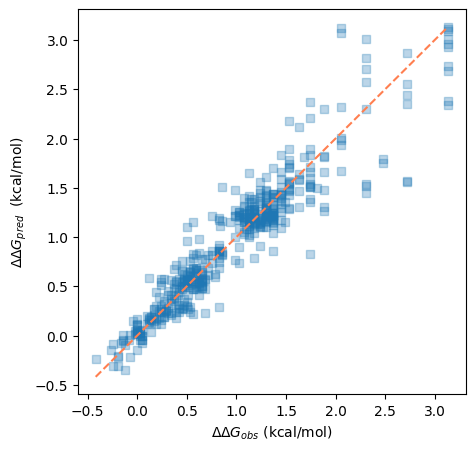

R2: 0.8803, MAE: 0.1569


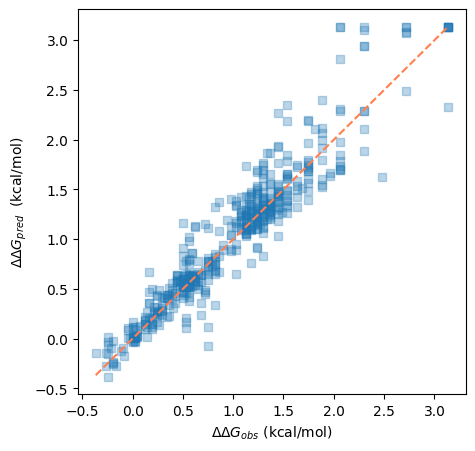

R2: 0.8826, MAE: 0.1568


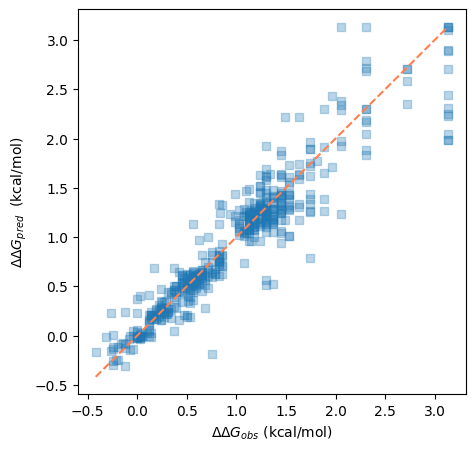

R2: 0.8844, MAE: 0.1580


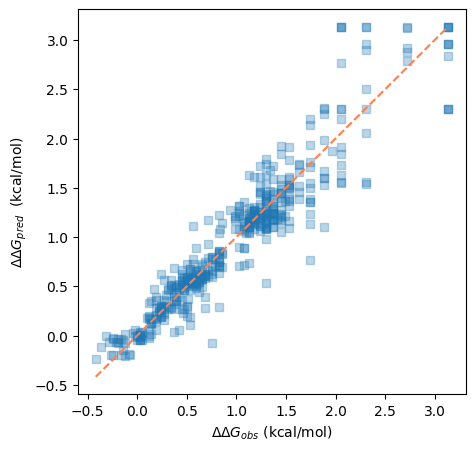

R2: 0.8836, MAE: 0.1581


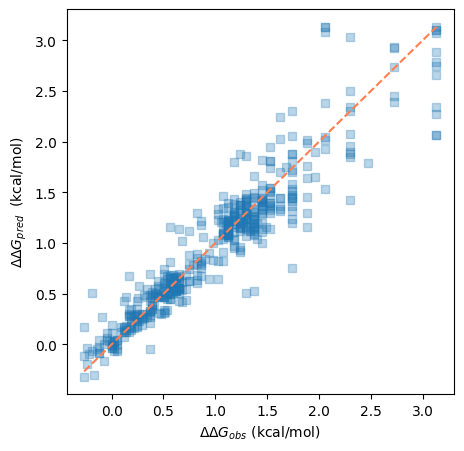

R2: 0.8814, MAE: 0.1640


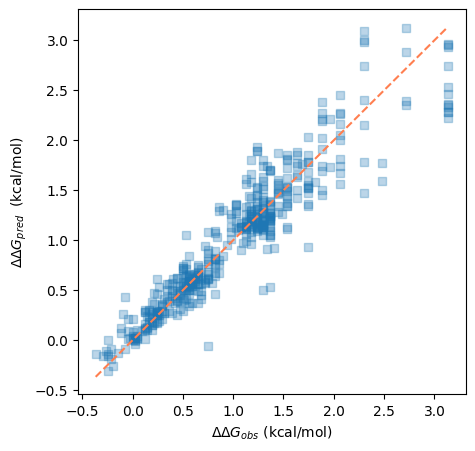

R2: 0.8822, MAE: 0.1561


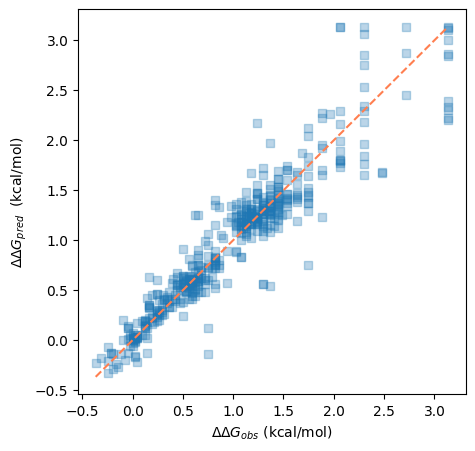

R2: 0.8991, MAE: 0.1489


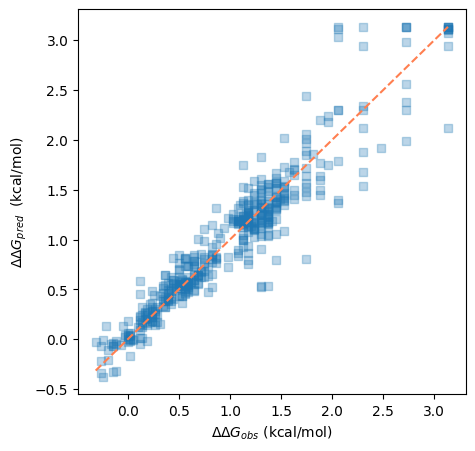

R2: 0.8857, MAE: 0.1611


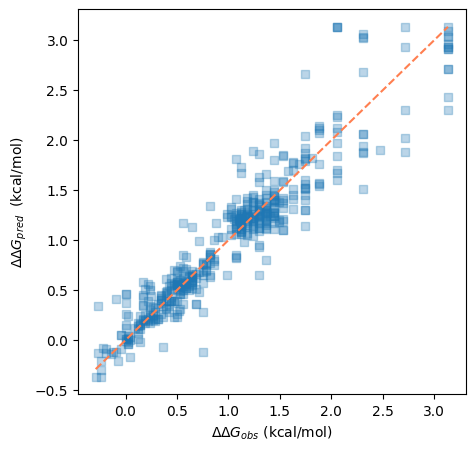

R2: 0.8729, MAE: 0.1704


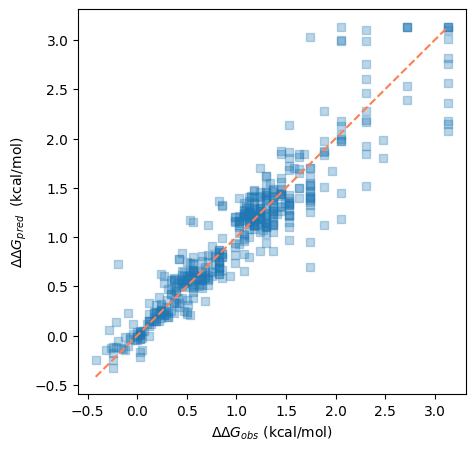

In [21]:
for trial in range(10):
    print(f"R2: {r2_score(all_test_y[trial],all_test_p[trial]):.4f}, MAE: {mean_absolute_error(all_test_y[trial],all_test_p[trial]):.4f}")
    plt.figure(figsize=(5,5))
    plt.scatter(all_test_y[trial],all_test_p[trial],alpha=0.3,marker="s")
    plt.plot([min(all_test_y[trial]),max(all_test_y[trial])],[min(all_test_y[trial]),max(all_test_y[trial])],"--",color="coral")
    plt.xlabel("$\Delta$$\Delta$$G$$_{obs}$ (kcal/mol)")
    plt.ylabel("$\Delta$$\Delta$$G$$_{pred}$  (kcal/mol)")
    plt.show()
    